Load and Prepare Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the feature-engineered dataset (with categorical columns already encoded)
data_path = r"D:\Portfolio\waste_management\data\processed\waste_data_feature_engineered.csv"
df_encoded = pd.read_csv(data_path)

# Auto one-hot encode any remaining categorical columns (if present)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Define target and features
target = 'Recycling Rate (%)'
features = df_encoded.drop(columns=[target])
X = features.values
y = df_encoded[target].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data loaded with {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")


Data loaded with 680 training samples and 170 testing samples.


Train Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear Regression trained.")
lr


Linear Regression trained.


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Train Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest trained.")
rf

Random Forest trained.


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Train XGBoost Regressor

In [6]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)
print("XGBoost trained.")
xgbr

XGBoost trained.


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Train LightGBM Regressor

In [7]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
print("LightGBM trained.")
lgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 680, number of used features: 63
[LightGBM] [Info] Start training from score 57.329412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Train CatBoost Regressor

In [8]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catb.fit(X_train, y_train)
print("CatBoost trained.")
catb

CatBoost trained.


In [11]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

models = {
    'Linear Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgbr,
    'LightGBM': lgbm,
    'CatBoost': catb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} RMSE: {rmse(y_test, y_pred):.2f}")


Linear Regression RMSE: 309.69
Random Forest RMSE: 301.39
XGBoost RMSE: 353.77
LightGBM RMSE: 360.45
CatBoost RMSE: 309.04


d:\Portfolio\waste_management\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


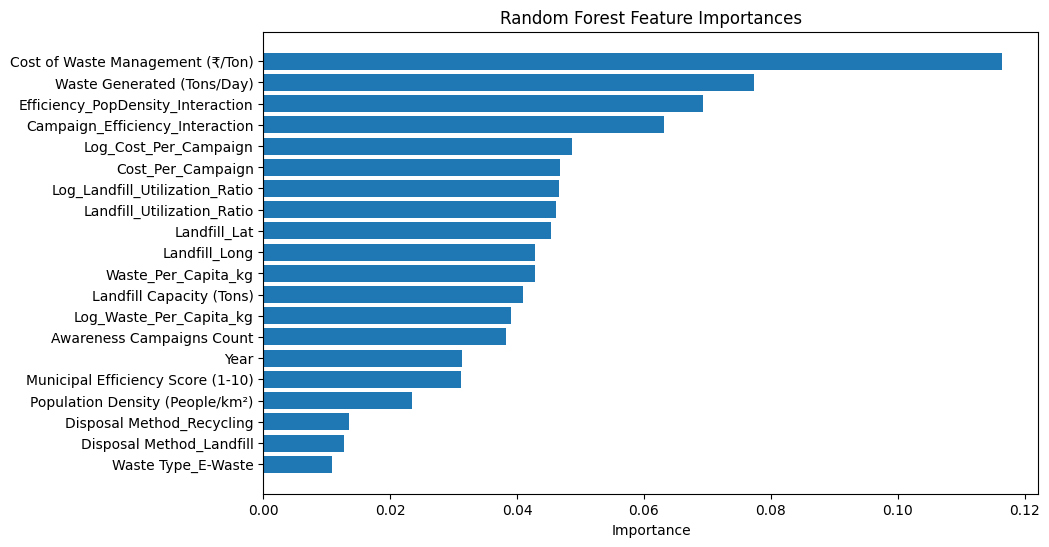

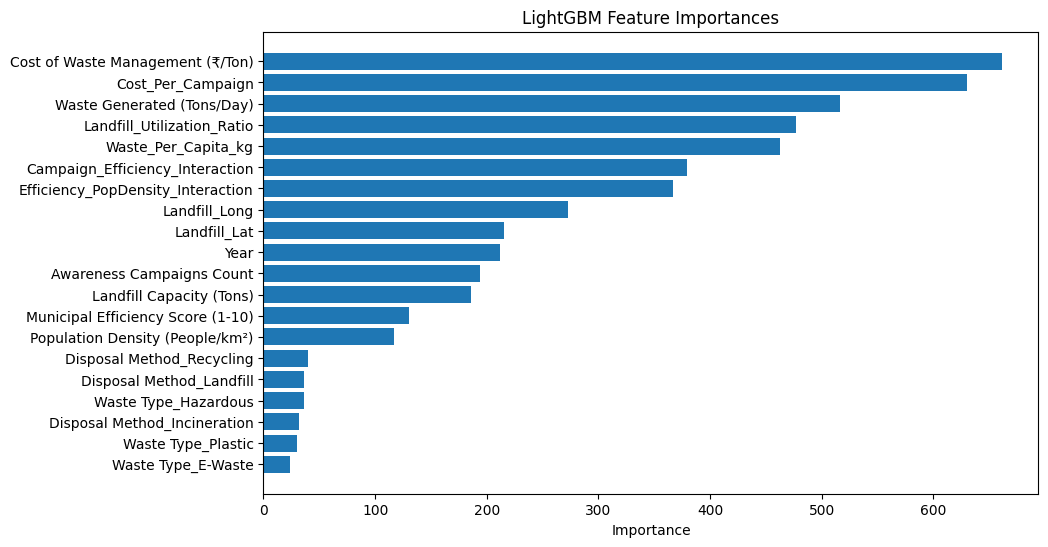

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-20:]  # top 20 features
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.show()

feature_names = features.columns

plot_feature_importance(rf, feature_names, 'Random Forest Feature Importances')
plot_feature_importance(lgbm, feature_names, 'LightGBM Feature Importances')
# CatBoost has built-in plot, e.g.: catb.plot_importance()


Linear Regression RMSE: 17.5979
Random Forest RMSE: 17.3605
XGBoost RMSE: 18.8088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 680, number of used features: 63
[LightGBM] [Info] Start training from score 57.329412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

d:\Portfolio\waste_management\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost RMSE: 17.5795


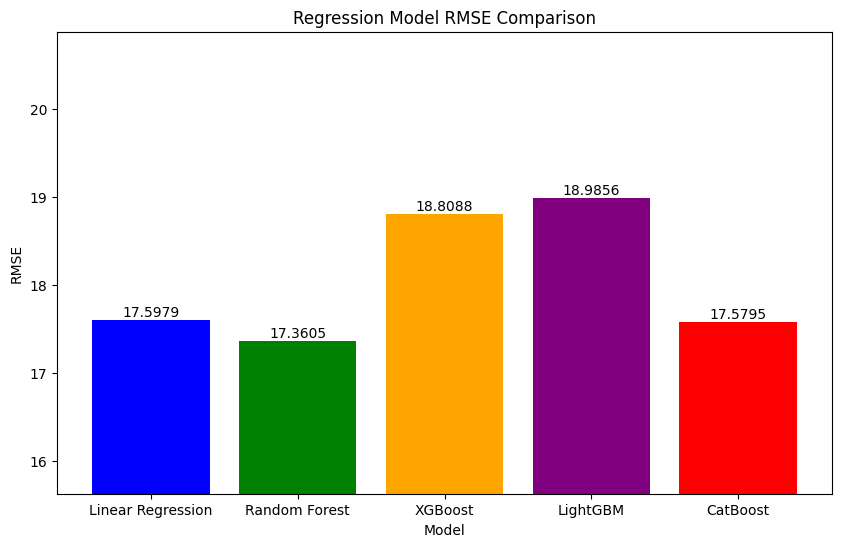

In [21]:
# Plot RMSE comparison
plt.figure(figsize=(10,6))
bars = plt.bar(rmse_scores.keys(), rmse_scores.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Regression Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.ylim(min(rmse_scores.values()) * 0.9, max(rmse_scores.values()) * 1.1)

# Train, predict and evaluate
rmse_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

# Show RMSE values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

print("Model Evaluation Metrics:\n")

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  R²:   {r2:.4f}\n")


Model Evaluation Metrics:

Linear Regression:
  RMSE: 17.5979
  MAE:  15.0687
  MSE:  309.6864
  R²:   -0.1385

Random Forest:
  RMSE: 17.3605
  MAE:  14.7675
  MSE:  301.3884
  R²:   -0.1080

XGBoost:
  RMSE: 18.8088
  MAE:  15.7278
  MSE:  353.7720
  R²:   -0.3006

LightGBM:
  RMSE: 18.9856
  MAE:  15.4526
  MSE:  360.4521
  R²:   -0.3251

CatBoost:
  RMSE: 17.5795
  MAE:  14.8476
  MSE:  309.0396
  R²:   -0.1361



d:\Portfolio\waste_management\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
